# Computational Social Science Project #3 

**Enter your Name:**Taylor Galdi

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# look at the inspections data
chicago_inspections_2011_to_2013.tail()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
17672,1393258,2013-12-17,CIAO BELLA CAFE,CIAO BELLA CAFE,2232690,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,Canvass,Pass,42.005587,-87.661077,"(42.00558686485114, -87.66107732040031)",Restaurant,0,0,6,1,0,1,0,2,6,0.452055,0,2232690-20130327,2232690.0,378808.0,"CIAO BELLA CAFE, INC.",CIAO BELLA CAFE,6800-6806 N SHERIDAN RD,CHICAGO,IL,60626.0,49.0,36.0,49-36,24.0,1006.0,Retail Food Establishment,735,Preparation of Food and Dining on Premise With...,2232690.0,ISSUE,2013-03-27,2015-04-15,AAI,42.005587,-87.661077,2013-03-27,2015-04-15,0.726027,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,25.370000,7.963333,0.776667,10.537839,1.376266,21.726951,0
17673,1395218,2013-12-31,Christian Fields Style Bar,NaN,2002599,Restaurant,Risk 2 (Medium),6550 S COTTAGE GROVE AVE,CHICAGO,IL,60637.0,Canvass,Pass,41.775275,-87.605963,"(41.77527503998271, -87.605963353554)",Restaurant,0,0,4,1,0,0,0,1,4,1.200000,0,2002599-20130716,2259935.0,315535.0,CHRISTIAN FIELDS INC.,CHRISTIAN FIELDS STYLE BAR,6550 S COTTAGE GROVE AVE 1ST,CHICAGO,IL,60637.0,20.0,18.0,20-18,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2002599.0,RENEW,2013-07-16,2015-07-15,AAI,41.775275,-87.605963,2009-11-18,2017-07-15,4.120548,0,0,0,0,0,1,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,56.680038,19.736283,32.355622,0
17674,1395224,2013-12-31,W CHICAGO - LAKESHORE,W CHICAGO,2189458,Restaurant,Risk 1 (High),644 N LAKE SHORE DR,CHICAGO,IL,60611.0,Canvass,Pass w/ Conditions,41.893871,-87.615275,"(41.89387134779289, -87.61527477728374)",Restaurant,3,3,5,0,0,0,0,0,0,2.000000,1,2189458-20130213,2189458.0,375962.0,CHSP TRS LAKESHORE LLC,W CHICAGO-LAKESHORE,644 N LAKE SHORE DR 1-32,CHICAGO,IL,60611.0,42.0,63.0,42-63,18.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2189458.0,ISSUE,2013-02-13,2015-02-15,AAI,41.893871,-87.615275,2013-02-13,2019-02-15,0.879452,0,0,0,0,0,0,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,10.937753,0.000002,19.213021,1
17675,1441493,2012-05-18,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,COURTYARD CAFE,1142007,Restaurant,Risk 1 (High),836 W WELLINGTON AVE,CHICAGO,IL,60657.0,Canvass,Pass,41.936450,-87.650552,"(41.93645016758182, -87.65055245204128)",Restaurant,0,0,3,1,0,0,0,0,3,0.000000,0,1142007-20110216,2071165.0,63145.0,ADVOCATE NORTH SIDE HEALTH NETWORK,ADVOCATE ILLINOIS MASONIC MEDICAL CENTER,836 W WELLINGTON AVE # 1,CHICAGO,IL,60657.0,44.0,14.0,44-14,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1142007.0,RENEW,2011-02-16,2013-02-15,AAI,41.936450,-87.650552,2002-03-20,2019-02-15,10.169863,0,0,0,0,0,0,0,0,0,0,0,0,0.000383,72.946667,10.143333,0.430000,40.972732,4.839867,20.946616,0
17676,1493801,2013-02-13,SODEXHO,SODEXHO,20432,Restaurant,Risk 1 (High),230 S LA SALLE ST,CHICAGO,IL,60604.0,Canvass,Pass,41.878538,-87.632414,"(41.878538291685196, -87.63241426118783)",Restaurant,0,0,4,1,0,0,0,0,4,0.000000,0,20432-20110216,2071169.0,63300.0,"SODEXO MANAGEMENT, INC.",SODEXO,230 

In [5]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

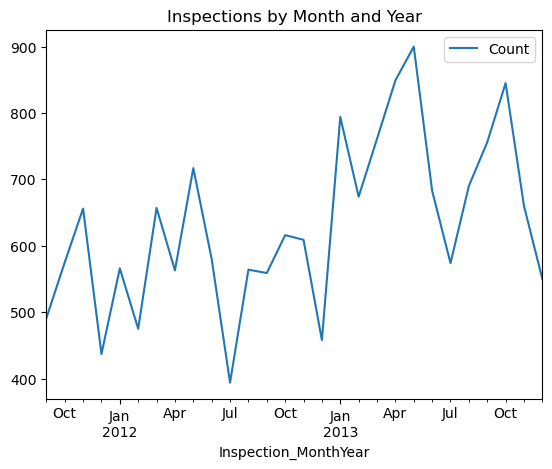

In [8]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

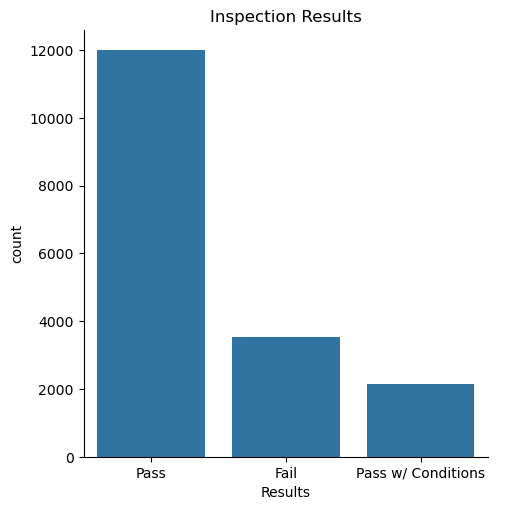

In [9]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

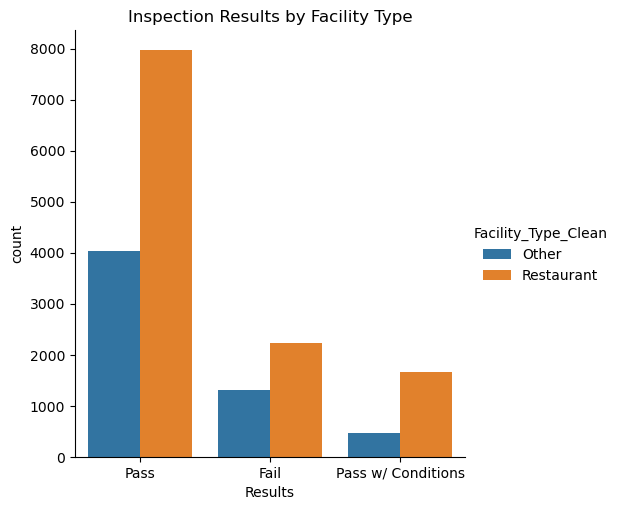

In [10]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

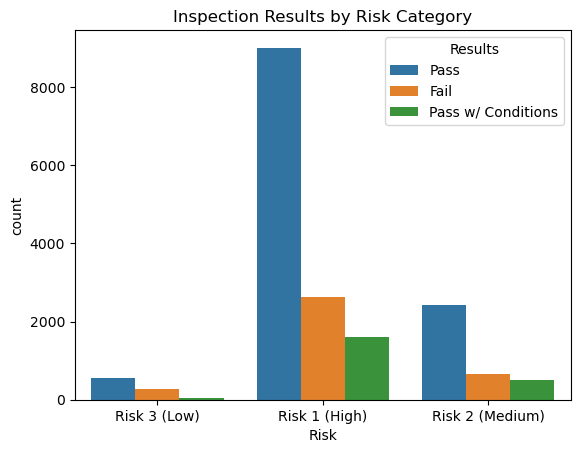

In [11]:
# view inspection results by risk category
sns.countplot(data=chicago_inspections_2011_to_2013,
               x="Risk",
               hue="Results")  
plt.title("Inspection Results by Risk Category")
plt.show()

## 2. Data Preprocessing and Cleaning

In [12]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [13]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
#Replace 'Pass w/ Conditions' with 'Pass'
y = y.replace({'Pass w/ Conditions': 'Pass'})
class_distribution=y.value_counts()
print("Original class distribution:\n", class_distribution)

#lb_style = LabelBinarizer()

#y = lb_style.fit_transform(y)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

Original class distribution:
 Results
Pass    12224
Fail     3087
Name: count, dtype: int64


In [14]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [15]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [16]:
# Set seed
np.random.seed(10)


# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                            y, 
                                                            train_size = .80, 
                                                            test_size = .20, 
                                                            stratify = y)

In [17]:
# Display the counts of each class
sample_distribution = y_train.value_counts()

# Show the class distribution

print("Class distribution of original dataset:\n", class_distribution)
print("Class distribution of sample:\n", sample_distribution)

Class distribution of original dataset:
 Results
Pass    12224
Fail     3087
Name: count, dtype: int64
Class distribution of sample:
 Results
Pass    9779
Fail    2469
Name: count, dtype: int64


In [18]:
#Display ratios
# Class counts
pass_count = sample_distribution.get('Pass', 0)
fail_count = sample_distribution.get('Fail', 0)

# Total observations
total_count = pass_count + fail_count 

# Calculate the ratios
pass_ratio = pass_count / total_count
fail_ratio = fail_count / total_count

# Print the ratios
print("Class balance before re-sampling:")
print(f"Pass: {pass_ratio:.3f}")
print(f"Fail: {fail_ratio:.3f}")

Class balance before re-sampling:
Pass: 0.798
Fail: 0.202


So the original ratios are  0.798/0.202 for "Pass", "Fail" respectively. When we resample (below) by oversampling our underrepresented class ("Fail" ), we'll start by changing this to 0.6/0.4 for "Pass", "Fail" respectively.

In [19]:
# install imbalance-learn 
!pip install imbalanced-learn==0.09.1

In [20]:
# call libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [21]:
totaldata=15311
# intitate instance of sampler and specify strategy
newpass_count = round (.6 * totaldata)
newfail_count = round (.4 * totaldata)
# Create a dictionary for the sampling strategy (desired target counts)
oversampling_strategy = {
    'Fail': newfail_count,
}

undersampling_strategy = {
    'Pass': newpass_count,
}

# Apply the RandomOverSampler to increase the minority classes
random_over_sampler = RandomOverSampler(sampling_strategy=oversampling_strategy)

X_train, y_train = random_over_sampler.fit_resample(X_train, y_train)

print("Class distribution after oversampling:", Counter(y_train))

# Then, apply the RandomUnderSampler to reduce the majority class to .5 ratio
random_under_sampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, 
                                          replacement=True)

X_train, y_train = random_under_sampler.fit_resample(X_train, y_train)

print("Class distribution again after undersampling:", Counter(y_train))


Class distribution after oversampling: Counter({'Pass': 9779, 'Fail': 6124})
Class distribution again after undersampling: Counter({'Pass': 9187, 'Fail': 6124})


In [22]:
#Display new ratios
# Class counts
finalpass_count = Counter(y_train).get('Pass', 0) 
finalfail_count = Counter(y_train).get('Fail', 0) 


# Total observations
finaltotal_count = finalpass_count + finalfail_count 

# Calculate the ratios
finalpass_ratio = finalpass_count / finaltotal_count
finalfail_ratio = finalfail_count / finaltotal_count

# Print the ratios
print("Class balance after over and undersampling:")
print(f"Pass: {finalpass_ratio:.3f}")
print(f"Fail: {finalfail_ratio:.3f}")

Class balance after over and undersampling:
Pass: 0.600
Fail: 0.400


### Model 1 Random Forest

In [23]:
#initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
    n_estimators=100,              # number of trees
    criterion='gini',              # splitting criterion
    max_depth=None,                # no limit on depth
    min_samples_split=2,           # min samples for splitting a node
    min_samples_leaf=1,            # min samples for a leaf
    min_weight_fraction_leaf=0.0,  # min weighted fraction of leaf
    max_features=None,             # use all features to split
    max_leaf_nodes=None,           # no limit on leaf nodes
    min_impurity_decrease=1e-07,   # early stopping threshold
    random_state=10,               # set random seed for reproducibility
)

In [24]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [10, 20, None],          # Max depth of trees
    'min_samples_split': [2, 5, 10]       # Minimum samples required to split a node
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [25]:
# Make predictions on the validation set
from sklearn.metrics import accuracy_score
y_pred = best_rf.predict(X_validate)  
validation_accuracy = accuracy_score(y_validate, y_pred)  
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.9269


In [26]:
# specify cross-validation
# ----------
scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean():.4f}")

Cross-validation scores: [0.92262488 0.92096669 0.91443501 0.92978445 0.92521228]
Average cross-validation score: 0.9226


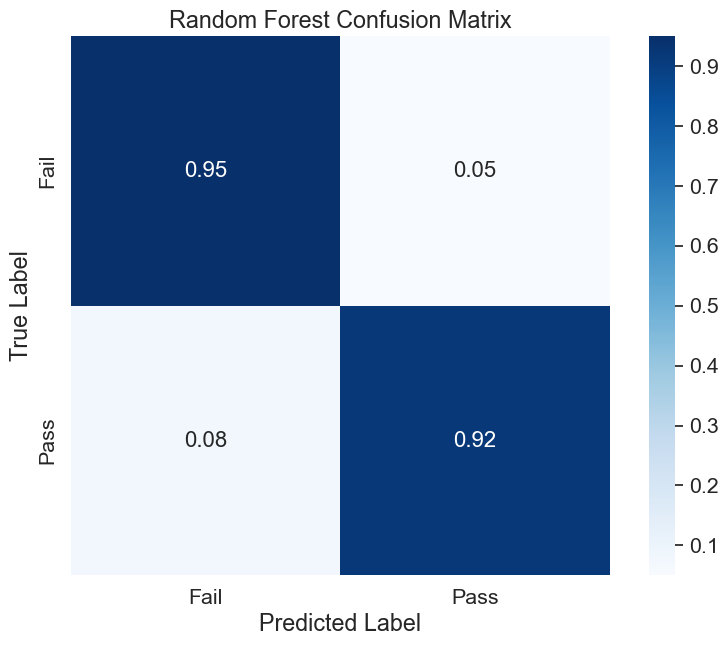

In [27]:
# Generate the confusion matrix
rfcf_matrix = confusion_matrix(y_validate, y_pred, 
                               normalize="true")

# Convert to DataFrame
cm_df = pd.DataFrame(rfcf_matrix, 
                           index=['Fail', 'Pass'],  # True labels
                           columns=['Fail', 'Pass'])  # Predicted labels


# Set figure specifications
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # For label size

# Plot the heatmap
sns.heatmap(cm_df, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt=".2f",  # Format the numbers as floats with 2 decimal places
            cmap="Blues",  # Color scheme for the heatmap
            cbar=True,     # Show the color bar
            square=True)   # Keep the heatmap square

# Titles and labels
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Model 2 Logistic Regression

In [28]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

# predict on the validation data
y_pred = logit_model.predict(X_validate)


In [29]:
print("Classes used by the model:", logit_model.classes_)

Classes used by the model: ['Fail' 'Pass']


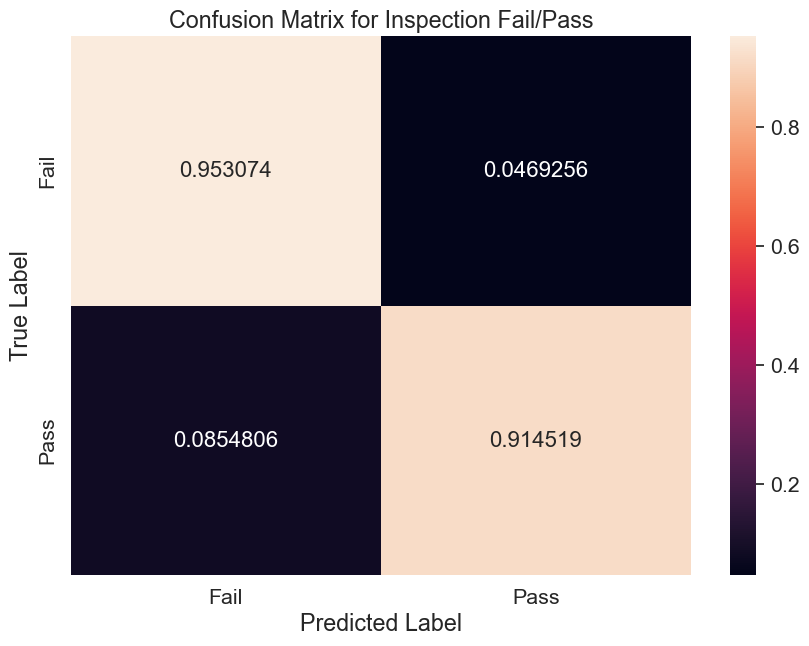

In [30]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, index=["Fail", "Pass"], columns=["Fail", "Pass"])

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Fail", 1: "Pass"})
df_cm.index = ["Fail", "Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix for Inspection Fail/Pass")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9226248775710089


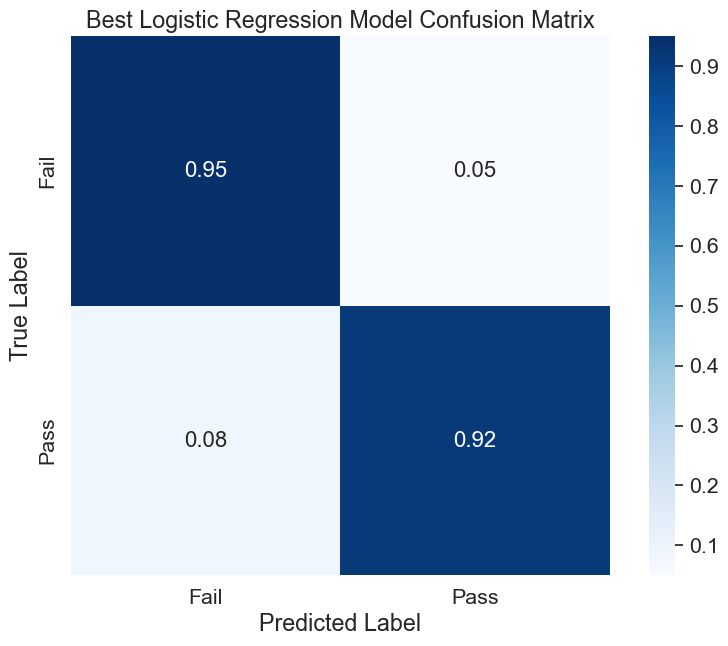

In [32]:
# Create a confusion matrix
bestlrcf_matrix = confusion_matrix(y_validate, 
                             best_logit_pred, 
                             normalize = "true")

# Convert to DataFrame
bestlrdf_cm = pd.DataFrame(bestlrcf_matrix, 
                           index=['Fail', 'Pass'],  # True labels
                           columns=['Fail', 'Pass'])  # Predicted labels

# Set figure specifications
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # For label size

# Plot the heatmap
sns.heatmap(bestlrdf_cm, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt=".2f",  # Format the numbers as floats with 2 decimal places
            cmap="Blues",  # Color scheme for the heatmap
            cbar=True,     # Show the color bar
            square=True)   # Keep the heatmap square

# Titles and labels
plt.title("Best Logistic Regression Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Model 3 ADABoost

In [33]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [34]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [35]:
# calculate mean score across models 
# ----------
scores.mean()

0.9146365471623236

### Model 4 Voting Classifier

In [36]:
# Logistic Regression - using liblinear solver
# ----------
log_reg = LogisticRegression(random_state = 10, 
                             solver='liblinear')

# Random Forest
# ----------
rf_classifier = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

# AdaBoost
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)


# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier)],
                        # specify voting
                        voting = 'hard')

# loop through each model to report accuracy
# ----------
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       voting_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ada Boost',
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.92 [Random Forest]
Accuracy: 0.91 [Ada Boost]
Accuracy: 0.92 [Ensemble]


In [37]:
# specify a "soft" voting classifer in this iteration
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier), 
                                     ],
                        # specify voting 
                        voting = 'soft')

# fit each classifer "c" to the data, predict the probability of the classifer and store as "probas"
probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (log_reg, 
                                                              rf_classifier,
                                                              ada_classifier,
                                                              voting_classifier)]

In [38]:
# create a dataset from the predicted probabilities
# ----------
probs_df = pd.DataFrame.from_records(probas).T # pulls the list of "probas" and stores as dataframe
probs_df.rename(columns = {0: 'logit',
                           1: 'rf',
                           2: 'ada',
                           3: 'ensemble'}, 
                inplace = True)

# view the first few observations
# ----------
probs_df.head(10)

,logit,rf,ada,ensemble
0,0.944797,1.00,0.513946,0.819581
1,0.979745,1.00,0.513450,0.831065
2,0.009088,0.02,0.494471,0.174520
3,0.976069,1.00,0.513440,0.829837
4,0.024221,0.12,0.494503,0.212908
5,0.436766,0.08,0.497572,0.338113
6,0.981942,1.00,0.514936,0.832293
7,0.992079,1.00,0.516276,0.836118
8,0.964159,1.00,0.513479,0.825880
9,0.987515,1.00,0.515538,0.834351


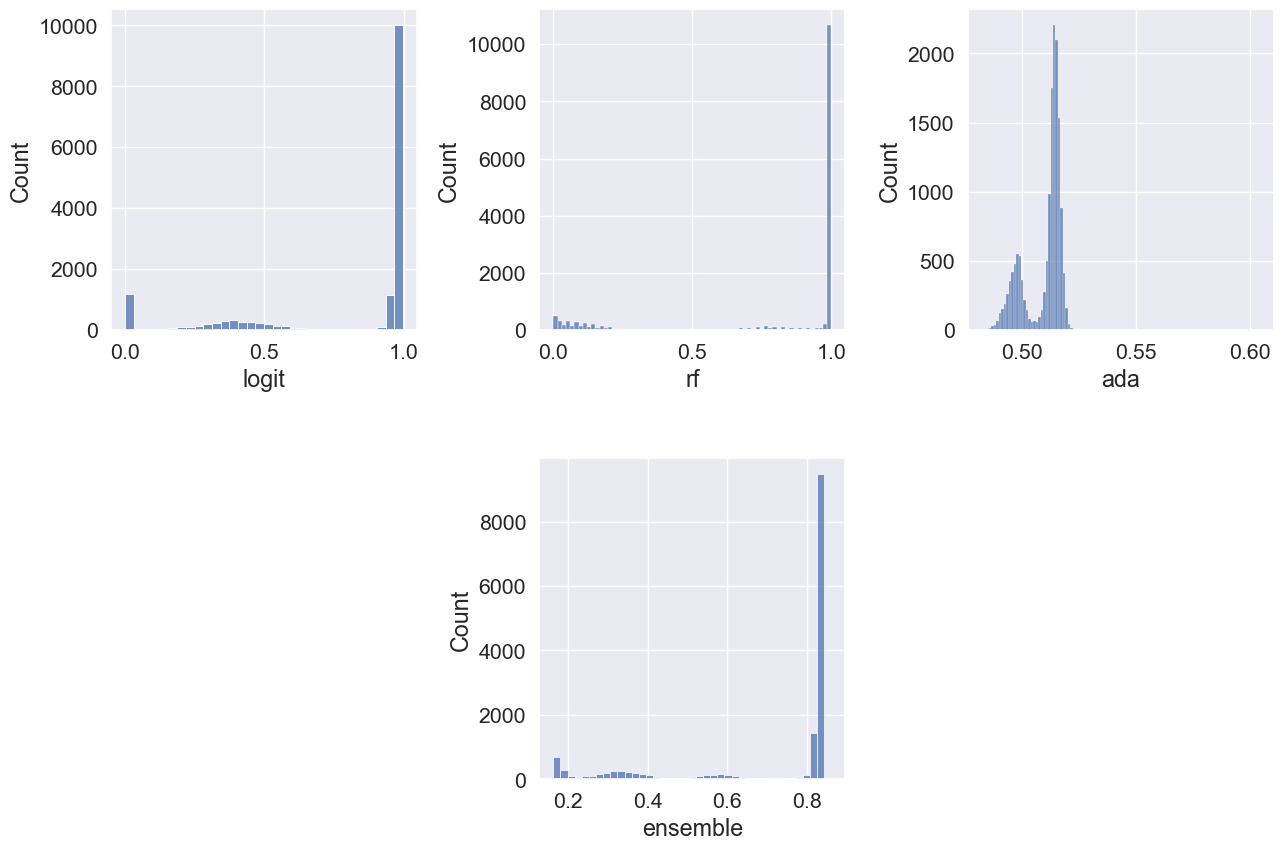

In [39]:
# visualize distributions
# ----------
# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# logit
ax = fig.add_subplot(2, 3, 1)
sns.histplot(probs_df, x="logit", ax=ax)

# random forest
ax = fig.add_subplot(2, 3, 2)
sns.histplot(probs_df, x="rf", ax=ax)

# adaptive boosting
ax = fig.add_subplot(2, 3, 3)
sns.histplot(probs_df, x="ada", ax=ax)

# ensemble
ax = fig.add_subplot(2, 3, 5)
sns.histplot(probs_df, x="ensemble", ax=ax)

# show plot 
plt.show()

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [40]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate



# Use StratifiedKFold to maintain class distribution in each fold
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over classifiers and labels
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       voting_classifier], 
                      ["Logistic Regression", 
                       "Random Forest", 
                       "Ada Boost",
                       "Ensemble"]):

    # Perform cross-validation with StratifiedKFold
    scores = cross_validate(clf, X, y.ravel(), 
                            scoring={'accuracy': 'accuracy', 
                                     'precision': 'precision_weighted', 
                                     'recall': 'recall_weighted', 
                                     'f1': 'f1_weighted'}, 
                            cv=stratified_kf)
    
    # Print the average of each metric
    print(f'{label} - '
          f'Accuracy: {scores["test_accuracy"].mean():.2f}, '
          f'Precision: {scores["test_precision"].mean():.2f}, '
          f'Recall: {scores["test_recall"].mean():.2f}, '
          f'F1: {scores["test_f1"].mean():.2f}')


Logistic Regression - Accuracy: 0.92, Precision: 0.93, Recall: 0.92, F1: 0.93
Random Forest - Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1: 0.93
Ada Boost - Accuracy: 0.92, Precision: 0.92, Recall: 0.92, F1: 0.92
Ensemble - Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1: 0.93


Because our goal is to conduct predictive auditing for at-risk establishments, we need to weigh the 'stakes' of our predictions.

Accuracy
In machine learning, accuracy isn't the only metric that we might care about. Accuracy is an expression of ratio of correct observations relative to incorrect observations. This calculation alone does not tell us much about whether we did a good job predicting all of the other categories that we might be concerned about.

Consider our census dataset. We saw earlier that the target data is not equally distributed - there were far more people with "<=50k" income. As we saw in our confusion matrices, our algorithms tended to predict observations belonging to the "<=50k" category remarkably well, but tended to do much worse with the ">50k" category.

QUESTION: Why do you think this might be the case?

ANSWER: The class imbalance means that an algorithm can tend to do better just by picking the majority class. Accuracy might look good this way, but with a severe enough class imbalance, this score could be misleading.

Precision is a measure of how well calibrated predictions are.
TP/(TP+FP)
This formula tell us of the predictions in the positive class we made, how many were correct.

Recall is defined as:
TP/(TP+FN)
Of all of the positive class members in the ground truth labels, how many did we successfully predict as positive?

The precision-recall tradeoff can be managed in a few different ways. One popular metric is the F1 score
F1 is advantageous because the numerator can be penalized by either low precision OR recall. The disadvantage of this approach is that without adjustments, the F1 score prioritizes precision and recall equally. Depending on the application, we might care about one more than the other.


We are concerned with reducing false positives (i.e. passing an establishment that should fail), so we are going to go with Random Forest.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

In [41]:
X.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA',
       'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE',
       'APPLICATION_TYPE_RENEW'],
      dtype='object')

### Model 1 (Random Forest) Features

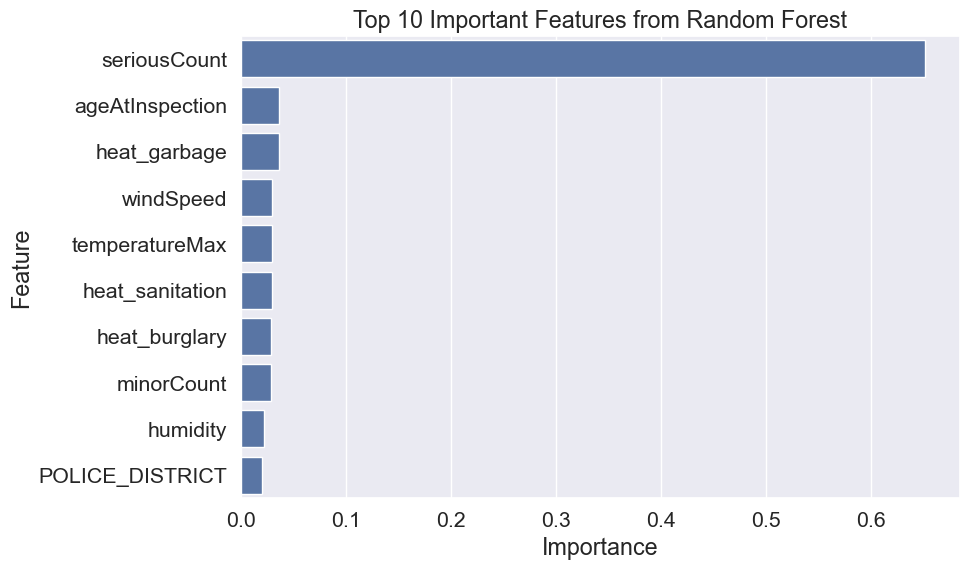

In [42]:
# import library
import seaborn as sns

# ----------
rf_classifier.fit(X, y.to_numpy())

# create feature importance dataframe
rffeat_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_classifier.feature_importances_
})

# plot 
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", 
            y="Feature", 
            data=rffeat_importances.nlargest(10, 'Importance'))

plt.title("Top 10 Important Features from Random Forest")
plt.tight_layout()
plt.show()

### Model 2 (Logistic Regression) Features

In [43]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])



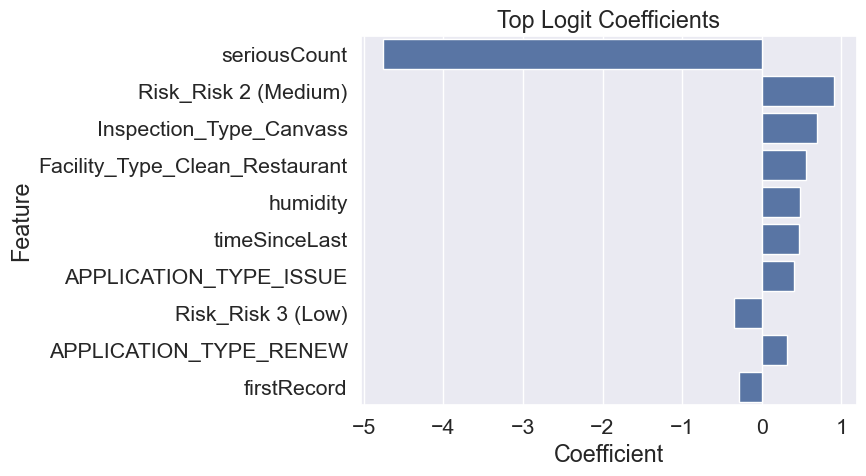

In [44]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

### Model 3 (ADABoost) Features

            Feature  Importance
29  heat_sanitation        0.16
28     heat_garbage        0.12
10  ageAtInspection        0.09
9   POLICE_DISTRICT        0.08
25        windSpeed        0.08
7     timeSinceLast        0.08
1      seriousCount        0.07
26         humidity        0.05
2        minorCount        0.05
24   temperatureMax        0.05


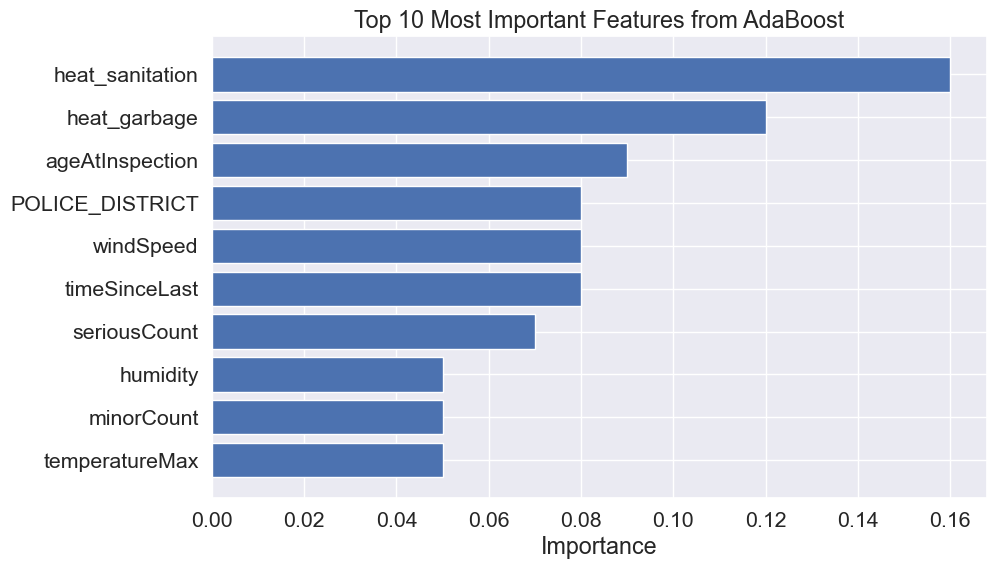

In [45]:
# Access the feature importances
importance = ada_classifier.feature_importances_

# Create a DataFrame to display the feature importances with the feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the DataFrame by the importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 12 features 
top_10_features = feature_importance_df.head(10)

# Print the top 12 feature importances
print(top_10_features)

# Plot the top 15 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features from AdaBoost')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [46]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------


In [47]:
#Order your audits by their probability of detecting a "Fail" score
# Get predicted probabilities for "Fail" class (class 0)
y_probs = rf_classifier.predict_proba(X_validate)[:, 0]  # Probabilities for 'Fail' (0th class)

# Extract the 'Inspection_ID' and 'DBA_Name' from the index for X_validate (since they're part of the index now)
inspection_ids = chicago_inspections_2011_to_2013.loc[X_validate.index].index.get_level_values('Inspection_ID')
DBA_names = chicago_inspections_2011_to_2013.loc[X_validate.index].index.get_level_values('DBA_Name')

# Create the DataFrame with Fail_Probability and the extracted Inspection_ID
audit_results = pd.DataFrame({
    'Inspection_ID': inspection_ids,  # Extracted from the index
    'DBA_Name': DBA_names,  # Extracted from the index
    'Fail_Probability': y_probs  # The predicted probability for 'Fail'
})

# Add the 'Results' column from y_validate (which contains the actual 'Pass' or 'Fail')
audit_results['Results'] = y_validate.values

# Sort by Fail Probability in descending order
audit_results_sorted = audit_results.sort_values(by='Fail_Probability', ascending=False)

# Display the top 10 audits with the highest 'Fail' probabilities
top_10_audits = audit_results_sorted.head(10)
print(top_10_audits)



      Inspection_ID                                         DBA_Name  \
1947        1154884                        ROSELAND PIZZAS AND TACOS   
32          1277660                                     UKRAINA DELI   
1961         659621                FISH & CHICKEN ON ROOSEVELT ,INC.   
118          598384                              MANJARES AL EXPRESS   
2880        1361059                                   KING FOOD MART   
1117        1367248                               BURGER KING #12371   
1253        1229367                              NORTH SHORE BANQUET   
620         1154798                         SKY LAKE CHINESE KITCHEN   
167         1305318  WASHBURNE CULINARY INSTITUTE INCUBATOR KITCHENS   
2837        1285733                           WILEY'S CHICKEN & RIBS   

      Fail_Probability Results  
1947               1.0    Fail  
32                 1.0    Fail  
1961               1.0    Fail  
118                1.0    Fail  
2880               1.0    Fail  
1117     

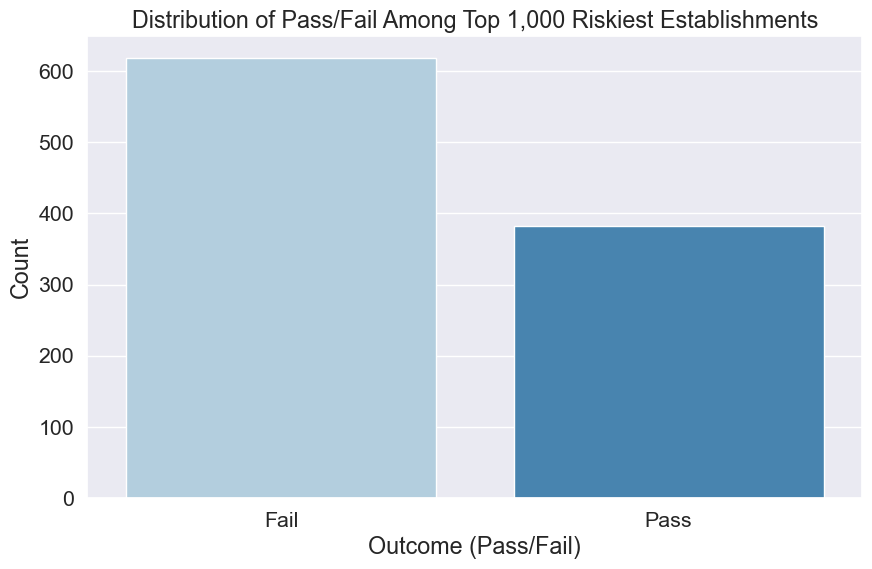

In [48]:
#
# Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# Select the top 1,000 riskiest establishments
top_1000_audits = audit_results_sorted.head(1000)

# Plot the distribution of "Pass" and "Fail" in the top 1,000 audits
plt.figure(figsize=(10, 6))
sns.countplot(x='Results', data=top_1000_audits, palette='Blues')
plt.title("Distribution of Pass/Fail Among Top 1,000 Riskiest Establishments")
plt.xlabel("Outcome (Pass/Fail)")
plt.ylabel("Count")
plt.show()

In [49]:
# Evaluate predictive auditing by counting actual Fail outcomes
actual_fail_predictive = audit_results_sorted.head(1000)['Results'].value_counts()
print(f"Actual Fail Count in Predictive Audits:\n{actual_fail_predictive}")

Actual Fail Count in Predictive Audits:
Results
Fail    618
Pass    382
Name: count, dtype: int64


In [50]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
# Simulate random audits by selecting 1,000 random rows
random_audits = chicago_inspections_2011_to_2013.sample(n=1000, random_state=42)  # Set random_state for reproducibility

In [51]:
# Evaluate random auditing by counting actual Fail outcomes
actual_fail_random = random_audits['Results'].value_counts()
print(f"Actual Fail Count in Random Audits:\n{actual_fail_random}")

Actual Fail Count in Random Audits:
Results
Pass                  672
Fail                  203
Pass w/ Conditions    125
Name: count, dtype: int64


In [52]:
# Calculate percentage of fails in predictive audits
predictive_fail_percentage = actual_fail_predictive['Fail'] / 1000 * 100

# Calculate percentage of fails in random audits
random_fail_percentage = actual_fail_random['Fail'] / 1000 * 100

print(f"Percentage of Fails in Predictive Audits: {predictive_fail_percentage}%")
print(f"Percentage of Fails in Random Audits: {random_fail_percentage}%")

Percentage of Fails in Predictive Audits: 61.8%
Percentage of Fails in Random Audits: 20.3%


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [109]:
columns2011=X.columns

In [110]:
testdata=pd.read_csv("data/Chicago Inspections 2014_updated.csv")
columns2014=testdata.columns

In [111]:
classdistribution2014 = testdata.shape
print(classdistribution2014 )

(4623, 73)


In [112]:
# Find common columns between the two datasets
common_columns = columns2011.intersection(columns2014)
print(f"Common Columns: {common_columns}")

# Find columns that are in the 2011 dataset but not in the 2014 dataset
df1_only_columns = columns2011.difference(columns2014)
print(f"Columns in 2011 but not in 2014: {df1_only_columns}")

# Find columns that are in the 2014 dataset but not in the 2011 dataset
df2_only_columns = columns2014.difference(columns2011)
print(f"Columns in 2014 but not in 2011: {df2_only_columns}")

#Make sure dataset only has columns that are common to both 
testdata = testdata[common_columns]

Common Columns: Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')
Columns in 2011 but not in 2014: Index([], dtype='object')
Columns in 2014 but not in 2011: Index(['ACCOUNT_NUMBER', 'ADDRESS', 'AKA_Name', 'APPLICATION_TYPE', 'Address',
       'BUSINESS_ACTIVITY', 'BUSINESS_ACTIVITY_ID', 'CITY', 'City', 'DBA_Name',
       'DOING_BUSINESS_AS_NAME', 'Facil

In [113]:
# Process Features (X)
X = testdata
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables

# Save feature columns for later reference
test_columns = X.columns.tolist()

# Load the target variable from CSV (y)
ytarget = pd.read_csv("data/Chicago Inspections 2014_updated.csv")
y = ytarget['Results']  # This is a Series containing the target labels

# Check unique values in 'Results' before replacement
print("Unique values in 'Results' before Replacement:", y.unique())

# Replace "Pass w/ Conditions" with "Pass" in the target variable 'y'
y = y.replace({'Pass w/ Conditions': 'Pass'})

# Check unique values in 'Results' after replacement
print("Unique values in 'Results' After Replacement:", y.unique())

Unique values in 'Results' before Replacement: ['Fail' 'Pass w/ Conditions' 'Pass']
Unique values in 'Results' After Replacement: ['Fail' 'Pass']


In [114]:
class_distribution=y.value_counts()
print("Original class distribution:\n", class_distribution)

Original class distribution:
 Results
Pass    3724
Fail     899
Name: count, dtype: int64


In [115]:
# Split into train/test sets
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Ensure that the columns in X_val match those in X_train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

In [116]:
# Display the counts of each class
sample_distribution = y_train.value_counts()

# Show the class distribution

print("Class distribution of original dataset:\n", class_distribution)
print("Class distribution of sample:\n", sample_distribution)

Class distribution of original dataset:
 Results
Pass    3724
Fail     899
Name: count, dtype: int64
Class distribution of sample:
 Results
Pass    2968
Fail     730
Name: count, dtype: int64


In [117]:
#Display ratios
# Class counts
pass_count = sample_distribution.get('Pass', 0)
fail_count = sample_distribution.get('Fail', 0)

# Total observations
total_count = pass_count + fail_count 

# Calculate the ratios
pass_ratio = pass_count / total_count
fail_ratio = fail_count / total_count

# Print the ratios
print("Class balance of sample before re-sampling:")
print(f"Pass: {pass_ratio:.3f}")
print(f"Fail: {fail_ratio:.3f}")

Class balance of sample before re-sampling:
Pass: 0.803
Fail: 0.197


In [118]:
sampletotaldata=total_count
# intitate instance of sampler and specify strategy
newpass_count2014 = round (.6 * sampletotaldata)
newfail_count2014 = round (.4 * sampletotaldata)
# Create a dictionary for the sampling strategy (desired target counts)
oversampling_strategy = {
    'Fail': newfail_count2014,
}

undersampling_strategy = {
    'Pass': newpass_count2014,
}

# Apply the RandomOverSampler to increase the minority classes
random_over_sampler = RandomOverSampler(sampling_strategy=oversampling_strategy)

X_train, y_train = random_over_sampler.fit_resample(X_train, y_train)


# Then, apply the RandomUnderSampler to reduce the majority class to .5 ratio
random_under_sampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, 
                                          replacement=True)

X_train, y_train = random_under_sampler.fit_resample(X_train, y_train)


In [119]:
#Display new ratios
# Class counts
finalpass_count = Counter(y_train).get('Pass', 0) 
finalfail_count = Counter(y_train).get('Fail', 0) 


# Total observations
finaltotal_count = finalpass_count + finalfail_count 

# Calculate the ratios
finalpass_ratio = finalpass_count / finaltotal_count
finalfail_ratio = finalfail_count / finaltotal_count

# Print the ratios
print("Class balance after over and undersampling:")
print(f"Pass: {finalpass_ratio:.3f}")
print(f"Fail: {finalfail_ratio:.3f}")

Class balance after over and undersampling:
Pass: 0.600
Fail: 0.400


In [120]:
#initialize a random forest classifier
# ----------
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,              # number of trees
    criterion='gini',              # splitting criterion
    max_depth=None,                # no limit on depth
    min_samples_split=2,           # min samples for splitting a node
    min_samples_leaf=1,            # min samples for a leaf
    min_weight_fraction_leaf=0.0,  # min weighted fraction of leaf
    max_features=None,             # use all features to split
    max_leaf_nodes=None,           # no limit on leaf nodes
    min_impurity_decrease=1e-07,   # early stopping threshold
    random_state=10,               # set random seed for reproducibility
)

In [121]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [10, 20, None],          # Max depth of trees
    'min_samples_split': [2, 5, 10]       # Minimum samples required to split a node
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [126]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set (X_test)
y_pred = best_rf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Set Accuracy: {accuracy:.4f}")

#Compare actual vs. predicted Fail counts
actual_fail_count = (y_val == 0).sum()  # Actual 'Fail' counts in y_validate (0 = Fail)
predicted_fail_count = (y_pred == 0).sum()  # Predicted 'Fail' counts in y_pred (0 = Fail)

# Print the actual vs predicted Fail counts
print(f"Actual Fail Count in Validation Data: {actual_fail_count}")
print(f"Predicted Fail Count in Validation Data: {predicted_fail_count}")

Validation Set Accuracy: 0.8962
Actual Fail Count in Validation Data: 0
Predicted Fail Count in Validation Data: 0


In [129]:
# specify cross-validation
# ----------
scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean():.4f}")

Cross-validation scores: [0.9027027  0.88864865 0.90162162 0.89718615 0.88852814]
Average cross-validation score: 0.8957


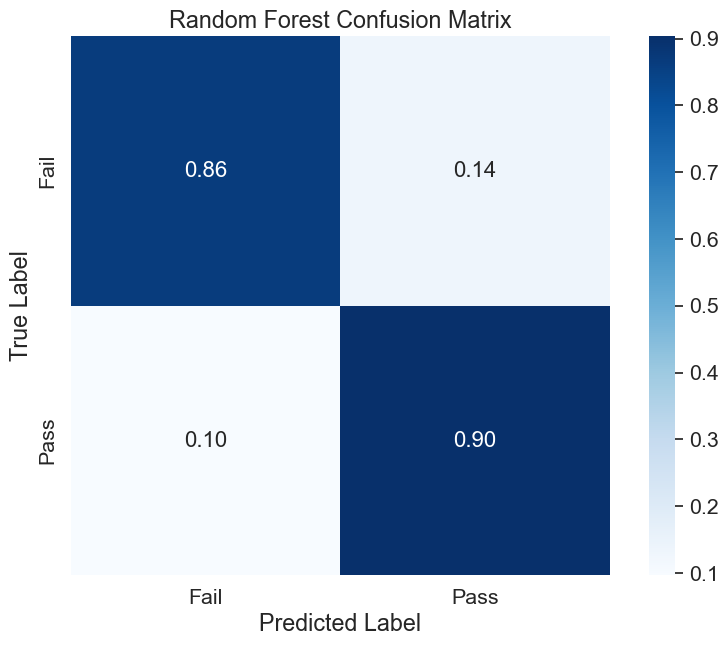

In [131]:
# Generate the confusion matrix
rfcf_matrix = confusion_matrix(y_val, y_pred, 
                               normalize="true")

# Convert to DataFrame
cm_df = pd.DataFrame(rfcf_matrix, 
                           index=['Fail', 'Pass'],  # True labels
                           columns=['Fail', 'Pass'])  # Predicted labels


# Set figure specifications
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # For label size

# Plot the heatmap
sns.heatmap(cm_df, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt=".2f",  # Format the numbers as floats with 2 decimal places
            cmap="Blues",  # Color scheme for the heatmap
            cbar=True,     # Show the color bar
            square=True)   # Keep the heatmap square

# Titles and labels
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [133]:
# evaluate
# -----------
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Precision, Recall, F1 Score for "Fail" class
precision = precision_score(y_val, y_pred, pos_label='Fail')
recall = recall_score(y_val, y_pred, pos_label='Fail')
f1 = f1_score(y_val, y_pred, pos_label='Fail')


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.6667
Recall: 0.8639
F1 Score: 0.7526


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...